## Declaration of Authorship {.unnumbered .unlisted}

We, [Bashir Hassan, Yanxu Lyu, Chuyue Wang, Han Jiang, Oujin Zhang], confirm that the work presented in this assessment is our own. Where information has been derived from other sources, we confirm that this has been indicated in the work. Where a Large Language Model such as ChatGPT has been used we confirm that we have made its contribution to the final submission clear.

Date: 19.12.2023

Student Numbers: 22226256, 23033381, 23039200, 23203113, 23204533

## Brief Group Reflection

| What Went Well | What Was Challenging |
| -------------- | -------------------- |
| A correlation  | B   data collection  |
| C cluster      | D   data cleaning    |

## Priorities for Feedback

Are there any areas on which you would appreciate more detailed feedback if we're able to offer it?

```{=html}
<style type="text/css">
.duedate {
  border: dotted 2px red; 
  background-color: rgb(255, 235, 235);
  height: 50px;
  line-height: 50px;
  margin-left: 40px;
  margin-right: 40px
  margin-top: 10px;
  margin-bottom: 10px;
  color: rgb(150,100,100);
  text-align: center;
}
</style>
```

{{< pagebreak >}}

# Response to Questions

In [5]:
import os
import pandas as pd

In [6]:
host = 'https://orca.casa.ucl.ac.uk'
path = '~jreades/data'
file = '2022-09-10-listings.csv.gz'
url  = f'{host}/{path}/{file}'

if os.path.exists(file):
  df = pd.read_csv(file, compression='gzip', low_memory=False)
else: 
  df = pd.read_csv(url, compression='gzip', low_memory=False)
  df.to_csv(file)

## 1. Who collected the data?

The data was collected by InsideAirbnb, an investigative website with a mission-driven project that offers data and advocacy regarding Airbnb's effects on residential communities (Cox et al., 2023). They source data from publicly available Airbnb information, which is then analyzed, cleaned, and aggregated for public discussion.

## 2. Why did they collect it?

InsideAirbnb collected the data for several key reasons: 

1. To highlight illegal renting and gentrification - highlight the financialisation of housing as speculative assets (Alexandri, 2022)

2. To facilitate public discussion and galvanise awareness to the public of the impact of STL properties

3. To use data for social change - influencing public policy

4. To provide accessible data analysis - so anyone can understand its impact

## 3. How was the data collected?  

Source Code and Technology: Data was scraped from the Airbnb website ("https://zh.airbnb.com") using Python, with results stored in a PostgreSQL database. Some of the Python code used can be found at "https://github.com/tomslee/airbnb-data-collection" (Abdulkareem Alsudais, 2021). They may have also used an extraction tool named import.io ("https://www.import.io/products").

Data Collection Details: The scraping script gathers multiple sets of data for each Airbnb listing, including host ID, room type, country, city, neighborhood, address, number of reviews, overall satisfaction rating, accommodation details, price, minimum stay duration, last modified timestamp, latitude, and longitude. Notably, certain data like occupancy rates, specific addresses, and guest information were not collected.

Accuracy and Limitations: The method aims for high accuracy, typically within 10% to 20% of the actual number of listings. The process did not use "trip dates" in searches, meaning listings marked as unavailable were not excluded. There may be challenges in ensuring accuracy of location data and neighborhood boundaries, sometimes including listings outside city boundaries. Despite these challenges, this data is generally considered suitable for policy and societal impact discussions.

## 4. How does the method of collection impact the completeness and/or accuracy of its representation of the process it seeks to study, and what wider issues does this raise?

a. Data Integrity and Accuracy:

* Data Integrity: IA data covers various points but is generally accurate within 10% to 20% of actual listings, providing a reasonable estimate with some inaccuracies.

* Data Accuracy: Some 2016 IA reviews were identified as "fake" or "spam," affecting data accuracy and quality.

* Data Scope Limits: Key details like occupancy rates, specific addresses, and guest information were missing, limiting analysis depth, especially regarding Airbnb's impact on hosts and local economies.

b. Broader Issues:

* Ethical and Privacy Concerns:
IA data collection raises ethical concerns about user privacy and consent, potentially seen as intrusive or violating platform terms.

* Impact on Policies and Society:
While the data offers insights into Airbnb's scale and nature in cities, it may not fully reflect nuanced impacts on real estate, neighborhoods, and local economies, including long-term housing availability and market dynamics.

## 5. What ethical considerations does the use of this data raise? 

User Privacy and Data Security: The Inside Airbnb (IA) database, while lacking sensitive information, requires adherence to data protection laws and Airbnb's privacy policies across multiple jurisdictions to ensure user privacy is respected.

Reliability of Original Data: Murray Cox's 2016 investigation into data manipulation before its release in New York City highlights the need for further validation of data reliability and transparency.

Secondary Data Interpretation: Murray Cox's processing of Airbnb data might introduce biases, necessitating a thorough understanding of the original data and methods to avoid misleading conclusions.

Impact on Public Interest: Airbnb data research can significantly affect communities and public interest. For example, areas with high Airbnb density could influence long-term rental markets, community satisfaction, and potentially reinforce stereotypes in diverse or low-income neighborhoods.


## 6. With reference to the data (*i.e.* using numbers, figures, maps, and descriptive statistics), what does an analysis of Hosts and Listing types suggest about the nature of Airbnb lets in London? 

In [7]:
# !pip install pyecharts==1.9.0
import subprocess
import sys

def install_package(package_name):
    try:
        __import__(package_name)
    except ImportError:
        subprocess.run([sys.executable, "-m", "pip", "install", package_name], check=True)

import pandas as pd
import numpy as np
import geopandas as gpd
install_package("libpysal")
from libpysal.weights import Queen
install_package("esda.moran")
from esda.moran import Moran, Moran_Local
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
install_package("json")
import contextily as ctx
from shapely.geometry import Point
import seaborn as sns
import requests
from io import BytesIO
from scipy.stats import pearsonr
from zipfile import ZipFile
import os
install_package("shutil") 
install_package("mpl_toolkits.axes_grid1") 
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from pyecharts import Map
install_package("re") 
install_package("warnings") 
install_package("shapely.geometry") 

In [8]:
path1 = "http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/visualisations/listings.csv"
airbnb = pd.read_csv(path1)
path2 = "http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/visualisations/neighbourhoods.geojson"
boros = gpd.read_file(path2)

import warnings
warnings.filterwarnings('ignore')

C:\Users\15827\AppData\Local\Temp\ipykernel_12324\1688204154.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv(path1)


In [9]:
## Convert csv to points
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(airbnb['longitude'], airbnb['latitude'])]
points = gpd.GeoDataFrame(airbnb, geometry=geometry, crs=boros.crs)

Statistics on Airbnb listings shows a total of 53,395 hosts, broadly categorized into four types: 

* **Individual hosts**, who, as homeowners, may reside in the listed house or apartment.

* **Professional hosts**, generally investors buying property specifically for short-term lease to obtain stable rental income.

* **Listing management teams**, companies or groups overseeing listings on behalf of property owners. 

* **Hoteliers**, who put listings on Airbnb to attract online bookings.

The listings indicates a host may choose to list separate rooms within the same apartment or offer multiple apartments in their entirety.

In [10]:
# Calculate the number of airbnbs of each host
host = airbnb.groupby('host_id')['host_name'].unique().reset_index(name='host_name')
host_count = airbnb['host_id'].value_counts().to_frame().reset_index(drop=False).sort_values(by='host_id').reset_index(drop=True)
host['count']=host_count['count']

# Sort by number of listings
host_sort = host.sort_values(by='count', ascending=False).reset_index(drop=True)

host_max = host_sort.iloc[:5, :]
host_min = host_sort.iloc[-5:, :]

Analyzing host property ownership reveals host types. Few listings (1-5) indicate individual hosts, while many (over 20) suggest professional hosts or teams.

In London, most Airbnb hosts are individuals, but professional hosts are notable. Specifically, 1,826 hosts manage over 5 listings each, totaling 24,832 listings (28.2% of all properties). STK Homes leads with 595 listings, indicating a trend towards standardization and accessibility.

In [11]:
# Calculate the number of hosts and total Listings in each interval
bins = [0, 5, 10, 20, float('inf')]
labels = ['1-5', '6-10', '11-20', '20+']
host_sort['interval'] = pd.cut(host_sort['count'], bins=bins, labels=labels, right=False)

interval = host_sort['interval'].value_counts().to_frame()
for c in labels:
    interval.loc[c,'total_listings'] = host_sort[host_sort['interval']==c]['count'].sum()

interval['percentage'] = round(interval['total_listings']/airbnb.shape[0], 2)

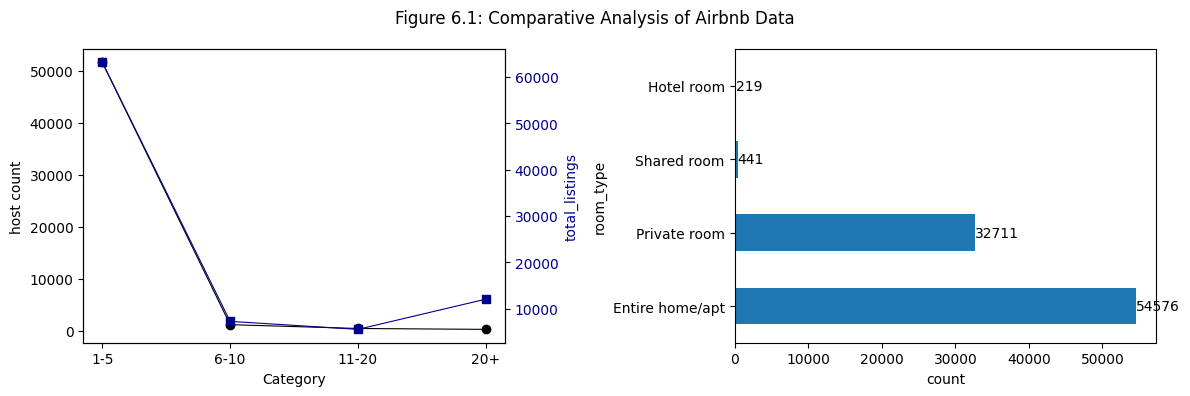

In [12]:
# plot a line chart for the number of hosts and total Listings in each interval
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(interval.index, interval['count'], linewidth=0.8, color='black', marker='o')
ax1.set_xlabel('Category')
ax1.set_ylabel('host count', color='black')
ax1.tick_params(axis='y')

ax3 = ax1.twinx()
ax3.plot(interval.index, interval['total_listings'], linewidth=0.8, color='darkblue', marker='s')
ax3.set_ylabel('total_listings', color='darkblue')
ax3.tick_params(axis='y', labelcolor='darkblue')

# Caculate the number of Airbnb listings for each room type
category = airbnb.room_type.value_counts().to_frame().reset_index(drop=False)
category['pecentage']=category['count']/airbnb.shape[0]

category.plot(kind='barh', y='count', x='room_type', ax=ax2, legend=False)
for index, value in enumerate(category['count']):
    ax2.text(value + 0.1, index, str(value), ha='left', va='center')

ax2.set_xlabel('count')
ax2.set_ylabel('room_type')

plt.suptitle('Figure 6.1: Comparative Analysis of Airbnb Data')

plt.tight_layout()
plt.show()

Different types of hosts contribute a variety of room types, predominantly "entire house/apt" (62.1%) and "private rooms" (37.2%). Additionally, there are a small number of "shared rooms" and "hotel rooms."

In [13]:
# Count the number of airbnbs in each neighbourhood
airbnb_sum = airbnb.neighbourhood.value_counts().to_frame().sort_values(by='neighbourhood')

# Calculate the median price of each neighbourhood
airbnb_sum['price_median'] = airbnb.groupby('neighbourhood')['price'].median()

# Count the number of each type of rooms in each neighbourhood
room_type_sum = airbnb.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)
room_type_sum.columns.name = None
room_type_sum.columns = room_type_sum.columns.str.replace(' ', '_')

# Merge dataframe
airbnb_area = pd.concat([airbnb_sum, room_type_sum], axis=1)

# Count the percentage of each type of rooms in each neighbourhood
airbnb_area['Entire_home/apt_percent'] = airbnb_area['Entire_home/apt']/airbnb_area['count']
airbnb_area['Hotel_room_percent'] = airbnb_area['Hotel_room']/airbnb_area['count']
airbnb_area['Private_room_percent'] = airbnb_area['Private_room']/airbnb_area['count']
airbnb_area['Shared_room_percent'] = airbnb_area['Shared_room']/airbnb_area['count']

# Reset index
airbnb_area = airbnb_area.reset_index(drop=False)

# Calculate the main room type of each neighbourhood
airbnb_area['main_room_type'] = max_column_names = airbnb_area.loc[:, ['Entire_home/apt','Hotel_room','Private_room','Shared_room']].idxmax(axis=1)

In [ ]:
## Join airbnb_area to boros

# boros_joined = boros.merge(airbnb_area, how='left', left_on='neighbourhood', right_on='neighbourhood')

# fig = plt.figure(figsize=(12, 6))
# grid = ImageGrid(fig, 111, nrows_ncols=(1, 3), axes_pad=0.2)

## Plot the proportion of Entire home/apts in each neighbourhood
# ax1 = grid[0]
# boros_joined.plot(column='Entire_home/apt_percent', cmap='Blues', linewidth=0.8, ax=ax1, edgecolor='0.8')
# ax1.set_title('Figure 6.5: Entire home/apt percentage')

## Plot the proportion of Private rooms in each neighbourhood
# ax2 = grid[1]
# boros_joined.plot(column='Private_room_percent', cmap='Blues', linewidth=0.8, ax=ax2, edgecolor='0.8')
# ax2.set_title('Figure 6.6: Private room percentage')

## Plot the main room type in each neighbourhood
# ax3 = grid[2]
# boros_joined.plot(column='main_room_type', categorical=True, legend=True, ax=ax3, cmap='Set3', legend_kwds={'bbox_to_anchor': (1, 1), 'prop': {'size': 7}})
# ax3.set_title('Figure 6.7: Main room type')

# plt.axis('off')
# plt.show()

In central London, there is a higher proportion of entire homes/apartments and a lower proportion of private rooms. This trend deviates in a few suburban areas, where there is a higher percentage of private rooms.

Further analysis reveals that entire home/apartment listings are prevalent in central areas due to their compact, apartment-dominated nature. These areas attract tourists, driving demand for entire homes and higher rental prices. Suburban areas, with detached houses, favor individual room rentals.

Therefore, the pattern of Airbnb rentals in London is influenced by both geographical location and tourist demand.

In [ ]:
# fig = plt.figure(figsize=(12, 6))
# grid = ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=1)

# Plot the number of listings in each neighbourhood
# ax1 = grid[0]
# boros_joined.plot(column='count', cmap='Blues', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=False)
# ax1.set_title('Figure 6.8: Airbnb listings count')

# Plot the median price of listings in each neighbourhood
# ax2 = grid[1]
# boros_joined.plot(column='price_median', cmap='Blues', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=False)
# ax2.set_title('Figure 6.9: Median price')

# plt.axis('off')
# plt.show()

## 7. Drawing on your previous answers, and supporting your response with evidence (e.g. figures, maps, and statistical analysis/models), how *could* this data set be used to inform the regulation of Short-Term Lets (STL) in London?  

In [14]:
# URLs
night_economy_url = "https://data.london.gov.uk/download/london-night-time-economy/e554ddcd-4fb7-42dc-b0d2-d73f88938cdb/night-time-economy.xls"
late_night_liscenses_url = "https://data.london.gov.uk/download/alcohol-and-late-night-refreshment-licensing-statistics/7836522b-3b4c-4aae-9aa3-9b2389621a96/licensed-premises-24-hour.xlsx"
inside_airbnb_url = 'http://data.insideairbnb.com/united-kingdom/england/london/2022-12-10/visualisations/listings.csv'
land_url = 'https://data.london.gov.uk/download/land-area-and-population-density-ward-and-borough/cc4e7e08-3071-488f-bdd9-a62cb1ed1c5c/land-area-population-density-london.xlsx'

#Data cleaning for the **Night Time Economy** dataset

#The dataset after cleaning should contain information about numbers of employees and workplaces in: 

# 1. Cultural and leisure activities
# 2. Activities which support night time cultural and leisure activities
# 3. 24-hour health and personal social services
# 4. Activities which support wider social and economic activities
# 5. Any Night Time Economy category
# 6. Total in all sectors

# read in different data from different sheets
df_night_employee_all = pd.read_excel(night_economy_url, sheet_name='NTE employees London boroughs', skiprows=3)
df_night_workplace_all = pd.read_excel(night_economy_url, sheet_name='NTE businesses London boroughs', skiprows=3)

# set the columns names
column_names = ['Area code', 'Area name', 'Night Time Economy category'] + list(df_night_employee_all.columns[3:])
df_night_employee_all.columns = column_names
df_night_workplace_all.columns = column_names

# divide night time economy types to different columns
df_night_employee = df_night_employee_all.pivot_table(index=['Area code', 'Area name'], columns='Night Time Economy category', values=2017, aggfunc='first').reset_index()
df_night_workplace = df_night_workplace_all.pivot_table(index=['Area code', 'Area name'], columns='Night Time Economy category', values=2017, aggfunc='first').reset_index()

# delete all the rows not belonging to London boroughs
df_night_employee = df_night_employee[df_night_employee['Area code'].str.startswith('E09')]
df_night_workplace = df_night_workplace[df_night_workplace['Area code'].str.startswith('E09')]

# have a look at the dataframes
# df_night_employee.head()
df_night_workplace.head()

# Data cleaning for the **Late Night Freshment Liscenses** dataset
#The dataset after cleaning should contain information about:
# 1. Number of 24-shops liscenses

# read in the data
df_24hour_store_all = pd.read_excel(late_night_liscenses_url, sheet_name='2017', skiprows=2, na_values = ':')

# set the columns names
column_names = ['Licensing authority', 'All total', 'Pubs, bars and nightclubs'] + list(df_24hour_store_all.columns[3:])
df_24hour_store_all.columns = column_names

# select specific column and drop rows not belonging to London boroughs
df_24hour_store = df_24hour_store_all[['Licensing authority', 'Total']].iloc[:33, [0, 1]]

# have a look at the dataframe
df_24hour_store.head()

# Data cleaning and summary for the **Inside Airbnb** dataset <br>
# **Note:** This chunck takes a little more time to load due to large file

# The dataset after cleaning should contain information about: 
# 1. Numbers of different room types in differernt boroughs
# 2. Mean prices of airbnb in different boroughs

# read in the data
airbnb_origin = pd.read_csv(inside_airbnb_url)

# calculate the counts for different room types in different boroughs
df_airbnb = airbnb_origin.pivot_table(index='neighbourhood', columns='room_type', values='id', aggfunc='count', fill_value=0).reset_index()

# calculate the mean prices in different boroughs
average_price = airbnb_origin.groupby('neighbourhood')['price'].mean().reset_index()
average_price.columns = ['neighbourhood', 'average price']

# left join
df_airbnb = pd.merge(df_airbnb, average_price, on='neighbourhood', how='left')
df_airbnb['Sum_room'] = df_airbnb[['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']].sum(axis=1)

# have a look at the dataframe
# df_airbnb.columns

#Data cleaning for the land dataset:

#The dataset after cleaning should contain information about: 
# 1. Area of different boroughs

df_land_all = pd.read_excel(land_url, sheet_name='Borough', skiprows=1, na_values = '')

# delete all the rows not belonging to London boroughs
df_land = df_land_all[['Code', 'Area name', 'Total Area (Hectares)']].iloc[:34]
#df_land = df_land[df_land_all['Code'].str.startswith('E09')]

# df_land.columns

### Understanding Impact on Local Economy: By analysing the night-time economy and late-night licenses data, regulators can assess how STLs affect local businesses and services.

The night-time economy is crucial to London's identity, significantly impacting its economy, culture, and social fabric. Policymakers recognize it not only for its contribution to employment and GDP but also as a symbol of cultural vibrancy in a 24-hour city (Zhang et al., 2022). To understand the impact of short-term lets (STLs) on this sector, we analyzed the correlation between STL density and night-time economy activity. This included reviewing data on late-night venues (bars, clubs, restaurants), their locations, revenue trends, and employment statistics in these areas, considering STLs' potential to boost local service demand and job opportunities.

Key correlations include:

* "Entire home/apt" and "Private room" are negatively correlated with employees in health and personal social services, indicating fewer such employees in areas with more of these Airbnb types.

* Airbnb density is positively correlated with employment in cultural and leisure activities, likely due to higher tourist activity.

* Various room types have moderate to strong correlations with workplace employees in different sectors. For instance, "Entire home/apt" correlates positively with cultural and leisure activities employees, suggesting more of these employees in areas with more entire homes/apts.ivities.

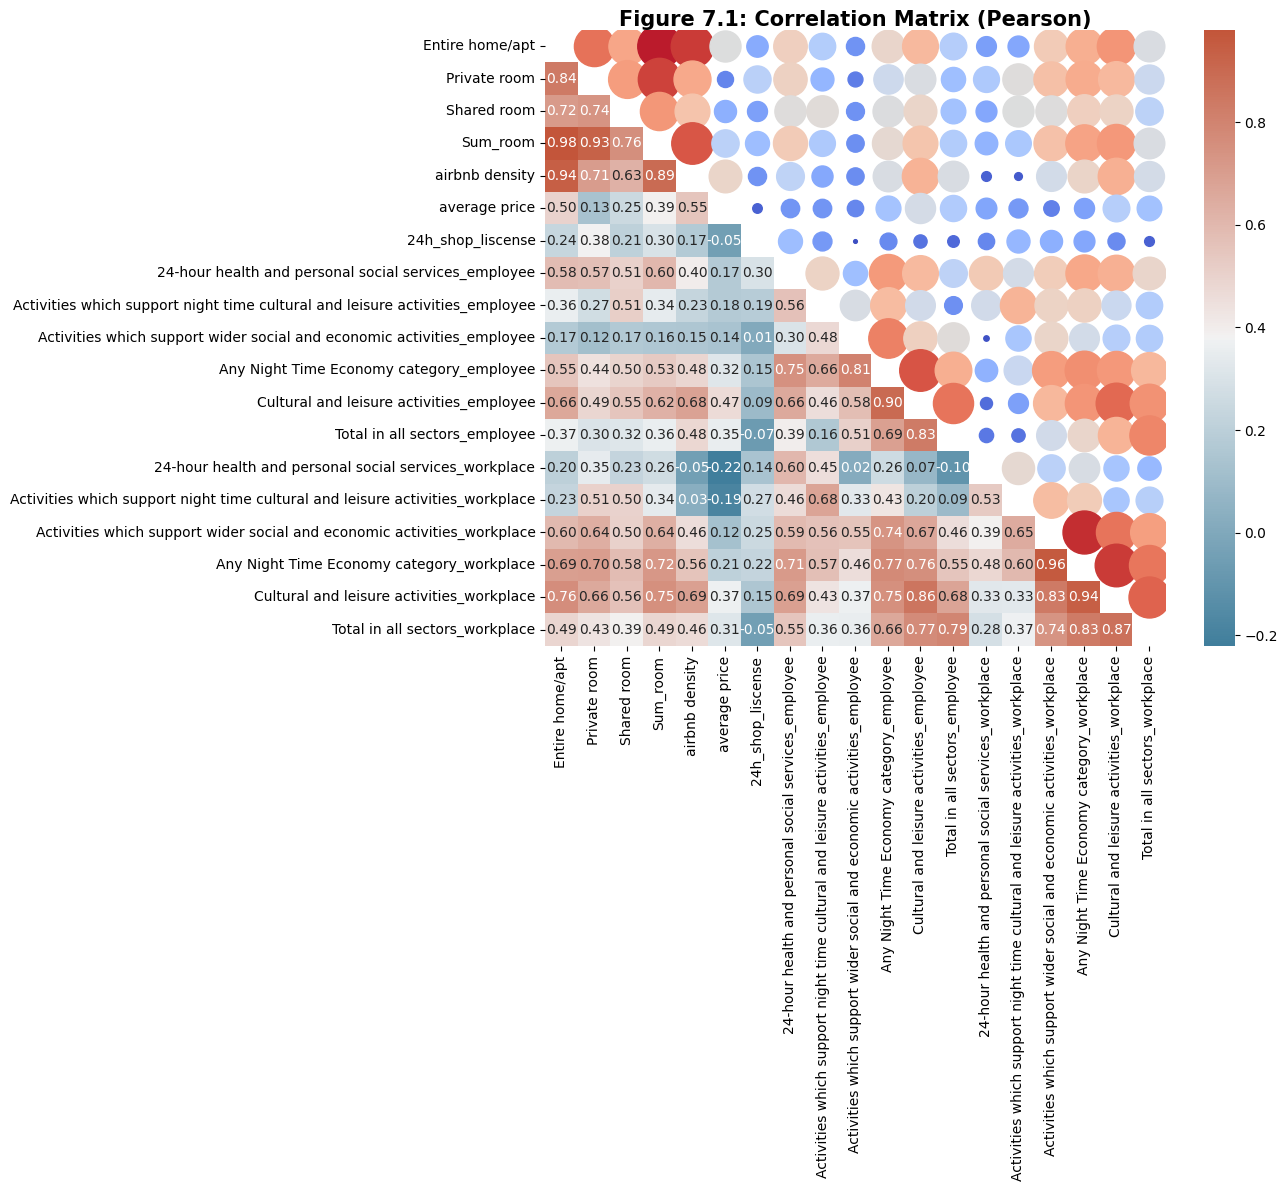

In [15]:
### **Correlation Matrix (Pearson)**

# Merge all datasets into **one**

df_night = pd.merge(df_airbnb, df_24hour_store, left_on='neighbourhood', right_on='Licensing authority', how='left')
df_night = df_night.rename(columns={'Total': '24h_shop_liscense'}).drop(columns='Licensing authority')

df_night_economy = pd.merge(df_night_employee, df_night_workplace, on='Area name', how='left', suffixes=('_employee', '_workplace'))
df_night = pd.merge(df_night, df_night_economy, left_on='neighbourhood', right_on='Area name', how='left')
df_night = df_night.rename(columns={'Area code_employee': 'Area code'}).drop(columns='Area code_workplace')

df_night = pd.merge(df_night, df_land, left_on='neighbourhood', right_on='Area name', how='left')

df_night['airbnb density'] = df_night['Sum_room'] / df_night['Total Area (Hectares)']

df_night.columns

df_night_clean = df_night.dropna()
corr = df_night_clean[['Entire home/apt', 'Private room', 'Shared room', 'Sum_room', 'airbnb density',
                       'average price', '24h_shop_liscense', '24-hour health and personal social services_employee',
                       'Activities which support night time cultural and leisure activities_employee',
                       'Activities which support wider social and economic activities_employee',
                       'Any Night Time Economy category_employee', 'Cultural and leisure activities_employee',
                       'Total in all sectors_employee', '24-hour health and personal social services_workplace',
                       'Activities which support night time cultural and leisure activities_workplace',
                       'Activities which support wider social and economic activities_workplace',
                       'Any Night Time Economy category_workplace', 'Cultural and leisure activities_workplace',
                       'Total in all sectors_workplace']].corr()

# create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool))

# create a custom diverging palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f")

# add circles with size and color proportional to the absolute correlation
for i in range(len(corr.columns)):
    for j in range(i):
        if not mask[i, j]:
            value = np.abs(corr.iloc[i, j])
            size = value * 1000  # Set the size based on the absolute correlation
            color = value  # Set the color based on the absolute correlation
            plt.scatter(i + 0.5, j + 0.5, s=size, c=color, cmap='coolwarm', marker='o', vmin=0, vmax=1)

title_text = "Figure 7.1: Correlation Matrix (Pearson)"
plt.title(title_text, fontsize=15, color="black", ha="center", va="center", fontweight="bold")
plt.show()

### **Spatial Autocorrelation Analysis (Moran's I)**

The Local Moran's I map for Airbnb density and the provided Global Moran's I statistics reveal spatial clustering in the distribution of Airbnb listings and various workforce and workplace categories across London. The high Global Moran's I for Airbnb density (0.44) with a significant p-value (0.001) indicates a strong clustered pattern of Airbnb listings, which suggests that Airbnbs are not evenly spread out but rather concentrated in specific areas; specifically central London.

The positive Global Moran's I values for private and shared rooms, as well as for sum_rooms, show moderate spatial clustering, with sum_rooms exhibiting a stronger clustering tendency (I = 0.24, P-value = 0.014). This might indicate areas of over-saturation in the STL market.

The Night Time Economy category and Cultural and leisure activities both for employees and workplaces, also show positive Global Moran's I values, which implies geographic clustering in these sectors. This suggests that certain areas may be experiencing more significant economic impacts from STLs due to a higher concentration of employees and businesses in these sectors. This is normally as a result of urban agglomeration (Fang & Yu, 2017). 

For policy-making, these insights could lead to targeted regulatory approaches. For instance, implementing geographically differentiated regulations that focus on areas with high Airbnb density could help to avoid exacerbating housing shortages or pricing local residents out of the market. Additionally, zoning adjustments or permitting processes might be considered to ensure a balanced distribution of STLs that supports tourism and local economies without compromising the needs of the local workforce, particularly in the night-time economy and cultural sectors preserving the local urban fabric.

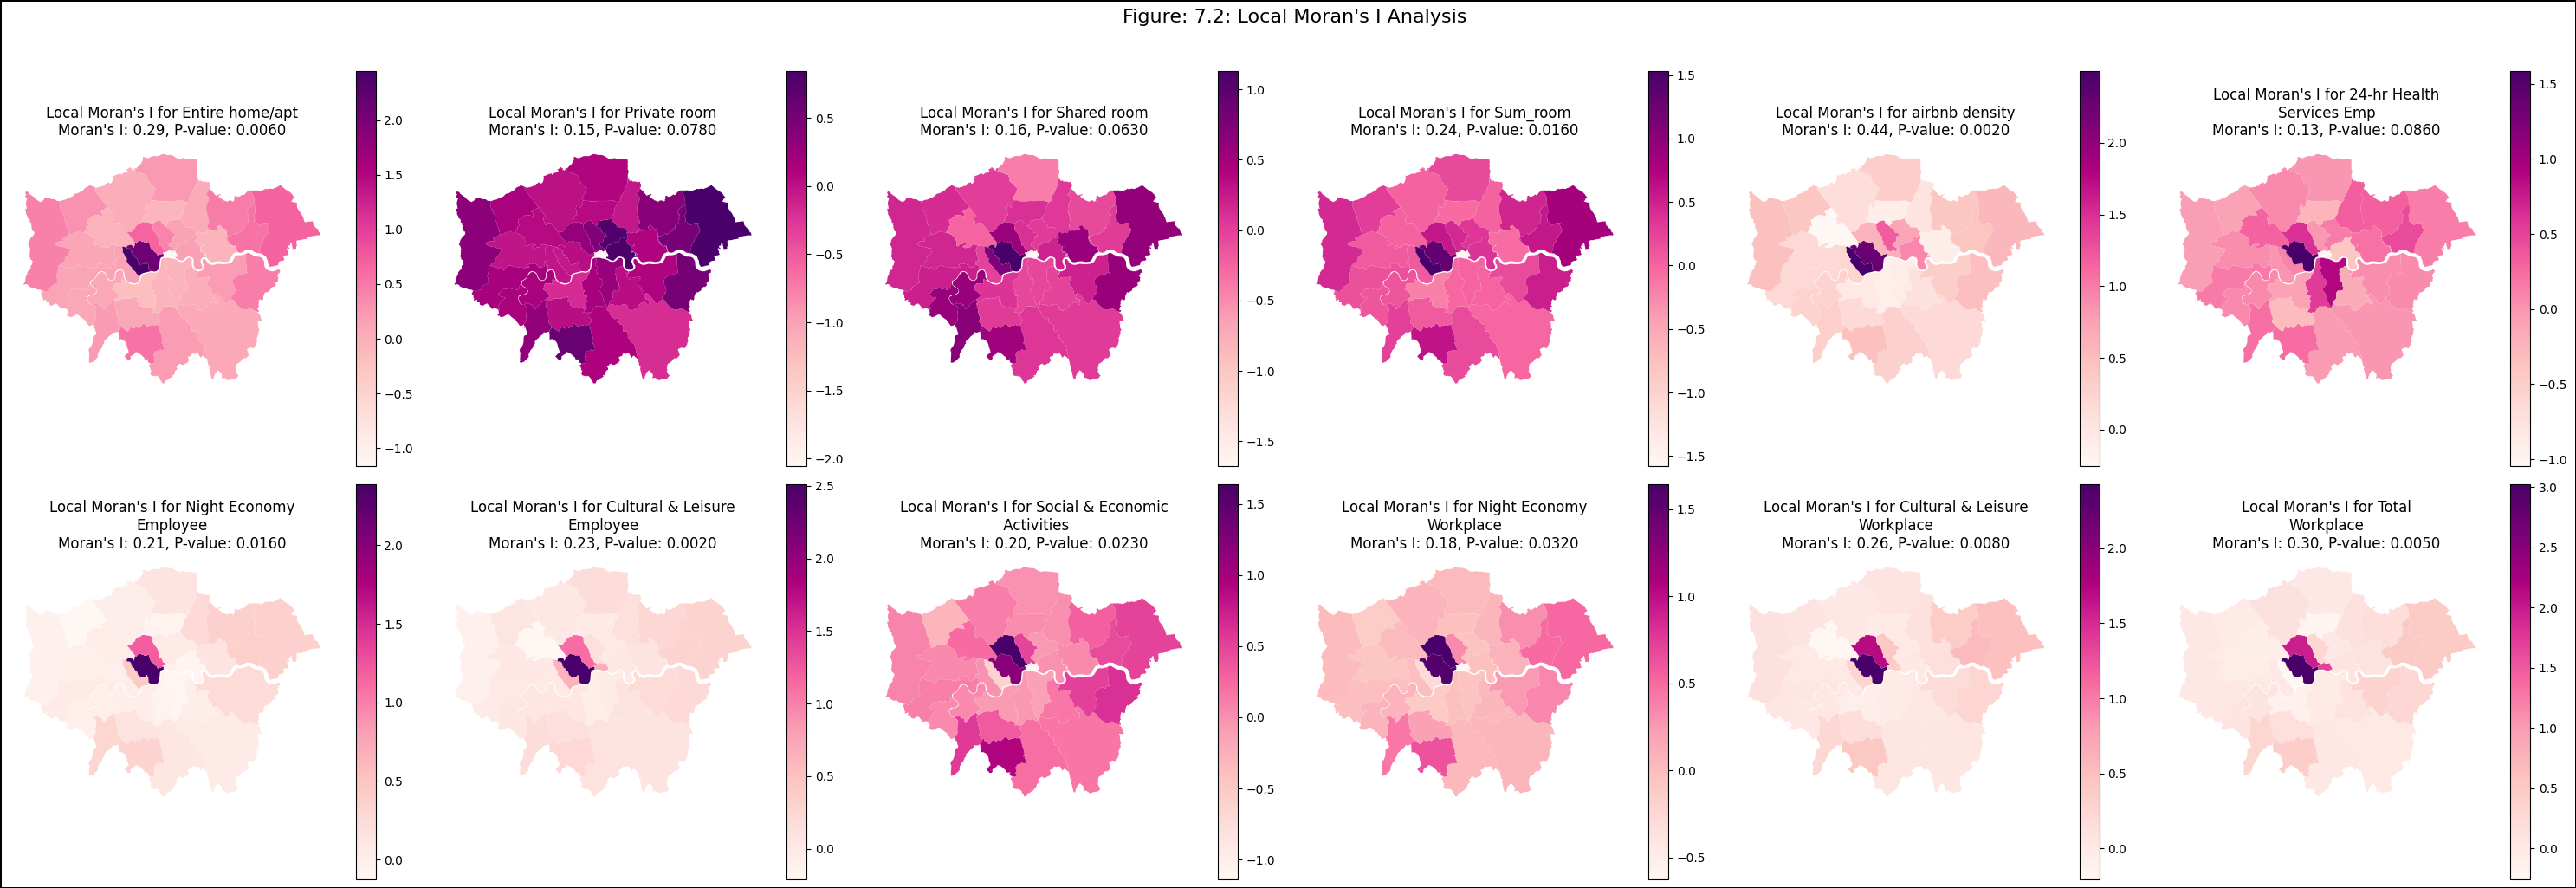

In [17]:
def install_package(package_name):
    try:
        __import__(package_name)
    except ImportError:
        subprocess.run([sys.executable, "-m", "pip", "install", package_name], check=True)

install_package("libpysal.weights") 
install_package("sklearn.cluster") 
install_package("sklearn.preprocessing") 
install_package("shutil")
import geopandas as gpd
from libpysal.weights import Queen
from esda.moran import Moran, Moran_Local
import matplotlib.pyplot as plt

geo_url = 'https://data.london.gov.uk/download/statistical-gis-boundary-files-london/9ba8c833-6370-4b11-abdc-314aa020d5e0/statistical-gis-boundaries-london.zip'
response = requests.get(geo_url)

# create a temporary file folder
temp_folder = 'temp_geo_data'
os.makedirs(temp_folder, exist_ok=True)

# unzip files to the temporary file folder
with ZipFile(BytesIO(response.content)) as zip_file:
    zip_file.extractall(temp_folder)

all_files = []
for root, dirs, files in os.walk(temp_folder):
    for file in files:
        all_files.append(os.path.join(root, file))

# look for shapefile
shp_files = [file for file in all_files if file.endswith('.shp')]

# select shapefile
if shp_files:
    selected_shp_file = shp_files[0]
    gdf_boroughs = gpd.read_file(selected_shp_file)
    # print(gdf_boroughs.head())
else:
    print("No SHP files found in the ZIP archive.")

# delete the temporary folder
# shutil.rmtree(temp_folder)

# Take the column 'Entire home/apt' as an example, do the **Moran's I and it's P value**  

# Adding the results to dataframe  

# Change the content of **variables** to change output map

# Transform the dataframe to **geodataframe**, and visualize the result on maps

# Merge Airbnb data
gdf_boroughs = gdf_boroughs.merge(df_night, left_on='NAME', right_on='neighbourhood', how='left')

variables_to_analyze = [
    'Entire home/apt',
    'Private room',
    'Shared room',
    'Sum_room',
    'airbnb density',
    '24-hour health and personal social services_employee',
    'Any Night Time Economy category_employee',
    'Cultural and leisure activities_employee',
    'Activities which support wider social and economic activities_workplace',
    'Any Night Time Economy category_workplace',
    'Cultural and leisure activities_workplace',
    'Total in all sectors_workplace'
 ]

short_labels = {
    '24-hour health and personal social services_employee': '24-hr Health\nServices Emp',
    'Any Night Time Economy category_employee': 'Night Economy\nEmployee',
    'Cultural and leisure activities_employee': 'Cultural & Leisure\nEmployee',
    'Activities which support wider social and economic activities_workplace': 'Social & Economic\n Activities',
    'Any Night Time Economy category_workplace': 'Night Economy\nWorkplace',
    'Cultural and leisure activities_workplace': 'Cultural & Leisure\nWorkplace',
    'Total in all sectors_workplace': 'Total\nWorkplace'
  
}

gdf_boroughs['airbnb density'] = pd.to_numeric(gdf_boroughs['airbnb density'], errors='coerce')

w = Queen.from_dataframe(gdf_boroughs)
w.transform = 'r'


fig, axes = plt.subplots(2, 6, figsize=(30, 10))  

fig.patch.set_linewidth(2)  
fig.patch.set_edgecolor('black')  

for i, var in enumerate(variables_to_analyze):
    moran_global = Moran(gdf_boroughs[var], w)

    moran_local = Moran_Local(gdf_boroughs[var], w)
    gdf_boroughs[f'moran_i_{var}'] = moran_local.Is
    gdf_boroughs[f'moran_p_{var}'] = moran_local.p_sim

    ax = axes[i // 6, i % 6]  
    gdf_boroughs.plot(column=f'moran_i_{var}', cmap='RdPu', legend=True, ax=ax)
    title = short_labels.get(var, var)
    ax.set_title(f"Local Moran's I for {title}\nMoran's I: {moran_global.I:.2f}, P-value: {moran_global.p_sim:.4f}")
    ax.axis('off')  

plt.suptitle("Figure: 7.2: Local Moran's I Analysis", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

### **Clustering**

#### Cluster 0 (Low Airbnb Density and Night-time Activity):

- Encouraging the development of Airbnb in these areas can promote economic growth and attract more attention to culturally significant local areas. Policies might include tax incentives for new Airbnb listings or streamlined permitting processes.

- Investment in infrastructure can make these areas more attractive for night activities. However, considering the perspectives of local residents is crucial to ensure development aligns with their needs and desires.

#### Cluster 1 (Moderate Airbnb Density and Night-time Activity): 

- Provide support and incentives to help small businesses sustain and grow the night-time economy. This could include grants and business development services.

- Organizing community-driven events is an excellent way to boost local economy and engagement. Policymakers can support this through funding, promotion, and providing necessary infrastructure.

#### Cluster 2 (High Airbnb Density and Night-time Economy Hotspots):

- It's crucial to strike a balance between the growth of STLs and the impact on the housing market. Regulation could include caps on the number of days a property can be let out, requiring permits, or enforcing zones where STLs are allowed.

- As these areas are active at night, ensuring the safety and convenience of night workers is essential. This could mean enhanced public transportation services during nighttime hours or increased security measures.curity measures.

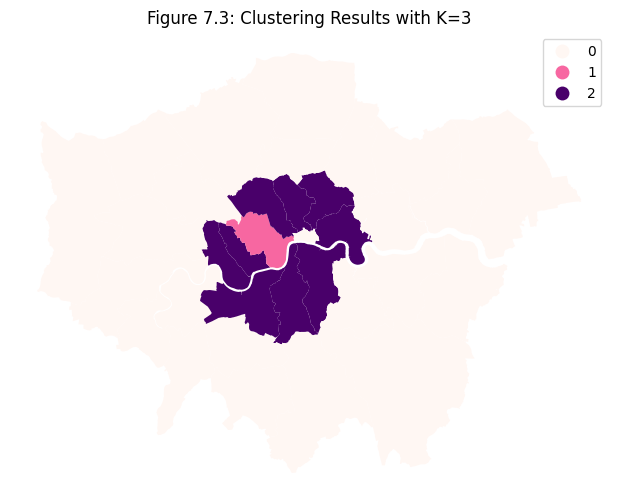

Boroughs in cluster 0:
Kingston upon Thames, Croydon, Bromley, Hounslow, Ealing, Havering, Hillingdon, 
Harrow, Brent, Barnet, Lewisham, Greenwich, Bexley, Enfield, Waltham Forest, 
Redbridge, Sutton, Richmond upon Thames, Merton, Haringey, Newham, 
Barking and Dagenham, City of London, 


Boroughs in cluster 1:
Westminster, 


Boroughs in cluster 2:
Lambeth, Southwark, Wandsworth, Hammersmith and Fulham, Kensington and Chelsea, 
Camden, Tower Hamlets, Islington, Hackney, 




In [18]:
### **Cluster**

# ***Selected factors*** Based on the results of spatial autocorrelation, I select the data columns

# Entire home/apt, Sum_room, airbnb density, 24-hour health and personal social services_employee, Any Night Time Economy category_employee, Cultral and leisure activities_employee Activities which ssupport wider social and economic activities_workplace, Any Night Time Economy category_workplace, Cultral and leisure activities_workplace, Total in all sectors_workplace

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

variables_to_analyze = [
    'Entire home/apt', 'Sum_room', 'airbnb density',
    '24-hour health and personal social services_employee',
    'Any Night Time Economy category_employee',
    'Cultural and leisure activities_employee',
    'Activities which support wider social and economic activities_workplace',
    'Any Night Time Economy category_workplace',
    'Cultural and leisure activities_workplace',
    'Total in all sectors_workplace'
]

data_for_clustering = gdf_boroughs[variables_to_analyze]

# standardize the data
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

#!pip install -U scikit-learn threadpoolctl

inertia = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(data_for_clustering_scaled)
    inertia.append(kmeans.inertia_)

# Based on the line diagram in the diagram, I chose a K value of 3 as reasonable 

k = 3

kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(data_for_clustering_scaled)

gdf_boroughs['cluster'] = clusters

fig, ax = plt.subplots(figsize=(10, 6))
gdf_boroughs.plot(column='cluster', categorical=True, legend=True, cmap='RdPu', ax=ax)
ax.set_title('Figure 7.3: Clustering Results with K=3')

ax.axis('off')

plt.show()

def print_list_in_lines(lst, max_length_per_line):
    line = ""
    for item in lst:
        new_line = f"{item}, "
        if len(line) + len(new_line) > max_length_per_line:
            print(line)
            line = new_line
        else:
            line += new_line
    if line:
        print(line)

for cluster_num in range(k):
    boroughs_in_cluster = gdf_boroughs.loc[gdf_boroughs['cluster'] == cluster_num, 'NAME']
    print(f"Boroughs in cluster {cluster_num}:")
    print_list_in_lines(boroughs_in_cluster.to_list(), 85)
    print("\n")

### Identifying High-Density STL Areas: The Airbnb dataset analysis revealed particular boroughs with high concentrations of STLs; guiding targeted regulations.  

1. Since 2008, Portugal created laws to regulate the develpoment of Airbnb style STL properties by mandating that they register with the local authority in the first instance. It was demonstrated that a 1% increase in a municipality airbnb share resulteed in a 3.7% increase in house price (Franco & Santos, 2021). Also, due to the spatial heterogeneity of Airbnbs, it was demonstated that there was a localised emphasis on building in the hitoric centres that attract toursits.

2. Denisty caps is a policy tool that establishes an upper limit on the number of Airbnb listings in a given area. This regulatory measure aims to mitigate concerns related to housing availability, affordability, noise, while preserving the spatially endowed character. It also facilitates better enforcement of environmental standards and taxation (Resch et al., 2016).  

### Conclusion: What can policy do?

In summary, this report highlights the potential of policy interventions to address Airbnb's impact on London's night-time economy and address broader housing and inequality issues (Shabrina et al., 2021). Through targeted short-term rental regulations, policymakers can create a more balanced housing market and support the stable development of the local night-time economy.

The Mayor of London and borough councils have key roles in shaping these policies and can collaborate to monitor and implement necessary regulations. Central government support is essential for providing the legal framework and resources needed for effective enforcement.

## Sustainable Authorship Tools

Written in Markdown and generated from [Quarto](https://quarto.org/). Fonts used: [Spectral](https://fonts.google.com/specimen/Spectral) (mainfont), [Roboto](https://fonts.google.com/specimen/Roboto) (<span style="font-family:Sans-Serif;">sansfont</span>) and [JetBrains Mono](https://fonts.google.com/specimen/JetBrains%20Mono) (`monofont`). 

21. doi:10.1177/0042098020970865. 

## References

Alsudais, Abdulkareem. 2021. “Incorrect Data in the Widely Used Inside Airbnb Dataset.” Decision Support Systems 141:113453. https://doi.org/10.1016/j.dss.2020.113453.

Boyd,  danah and Crawford, K. (2012) ‘CRITICAL QUESTIONS FOR BIG DATA’, Information, Communication & Society, 15(5), pp. 662–679. Available at: https://doi.org/10.1080/1369118X.2012.678878.

Cox, M., Morris, J. and Higgins, T. (2023) Inside Airbnb, Inside Airbnb: Home. Available at: http://insideairbnb.com/ (Accessed: 18 December 2023). 

Chica-Olmo, J., González-Morales, J. and Zafra-Gómez, J. (2020) ‘Effects of location on Airbnb apartment pricing in Malaga’, TOURISM MANAGEMENT, 77. Available at: https://doi.org/10.1016/j.tourman.2019.103981.

Serrano, L., Sianes, A. and Ariza-Montes, A. (2020) ‘Understanding the Implementation of Airbnb in Urban Contexts: Towards a Categorization of European Cities’, LAND, 9(12). Available at: https://doi.org/10.3390/land9120522.

Alexandri, G. (2022) ‘Housing financialisation a la griega’, Geoforum, 136, pp. 68–79. doi:10.1016/j.geoforum.2022.07.014.

Franco, S.F. and Santos, C.D. (2021) ‘The impact of Airbnb on residential property values and rents: Evidence from Portugal’, Regional Science and Urban Economics, 88, p. 103667. doi:10.1016/j.regsciurbeco.2021.103667. 

Resch, E. et al. (2016) ‘Impact of urban density and building height on energy use in cities’, Energy Procedia, 96, pp. 800–814. doi:10.1016/j.egypro.2016.09.142. 

Hill, R.J., Pfeifer, N. and Steurer, M. (2023) ‘The Airbnb Rent Premium and the crowding-out of long-term rentals’, Journal of Housing Economics, 61. doi:10.1016/j.jhe.2023.101935. 

Zhang, Y., Li, H. and Ren, G. (2022) ‘Quantifying the social impacts of the London night tube with a double/debiased machine learning based difference-in-differences approach’, Transportation Research Part A: Policy and Practice, 163, pp. 288–303. doi:10.1016/j.tra.2022.07.015. 

Fox, W.F., Hargaden, E.P. and Luna, L. (2022) ‘Statutory incidence and sales tax compliance: Evidence from wayfair’, Journal of Public Economics, 213, p. 104716. doi:10.1016/j.jpubeco.2022.104716. 

Fang, C. and Yu, D. (2017) ‘Urban agglomeration: An evolving concept of an emerging phenomenon’, Landscape and Urban Planning, 162, pp. 126–136. doi:10.1016/j.landurbplan.2017.02.014. 

Shabrina, Z., Arcaute, E. and Batty, M. (2021) ‘Airbnb and its potential impact on the London housing market’, Urban Studies, 59(1), pp. 197–221. doi:10.1177/0042098020970865. 
